# Outliers

***


In this notebook, you will learn about outliers.

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss

## What is an outlier?

***

We have to be careful - extreme values are not necessarily due to error.

## The Normal Distribution - Scaling

***

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} $$

In [2]:
# The number pi.
np.pi

3.141592653589793

In [3]:
# Square root of 2.
np.sqrt(2)

1.4142135623730951

In [4]:
# An approximation, but very close to 2.
1.4142135623730951**2

2.0000000000000004

In [5]:
# Called the scale in numpy.
sigma = 1.0
sigma

1.0

In [6]:
# This is just a number, close to 0.4.
1.0 / np.sqrt(2 * np.pi * sigma**2)

0.3989422804014327

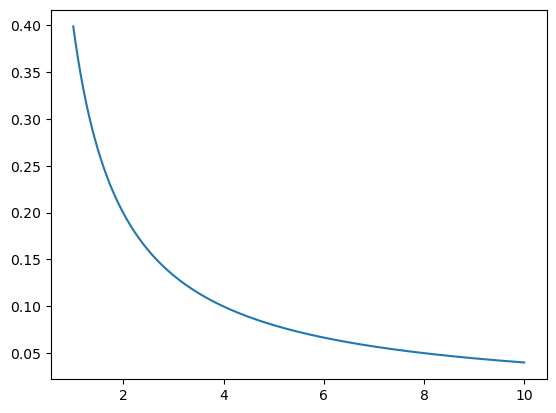

In [7]:
# Varying values of sigma for comparison.
sigma_vals = np.linspace(1.0, 10.0, 1000)

# Plot the formula.
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2));

## The Normal Distribution - the $e$ part

***

$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [8]:
# Just a number, like pi.
np.e

2.718281828459045

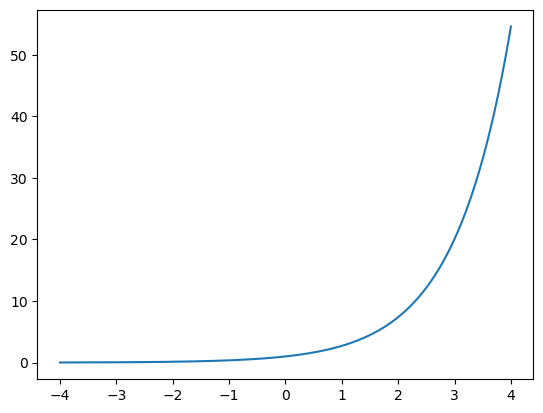

In [9]:
# Range of x values for plotting.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of e^x - built into numpy as np.exp.
plt.plot(x, np.exp(x));

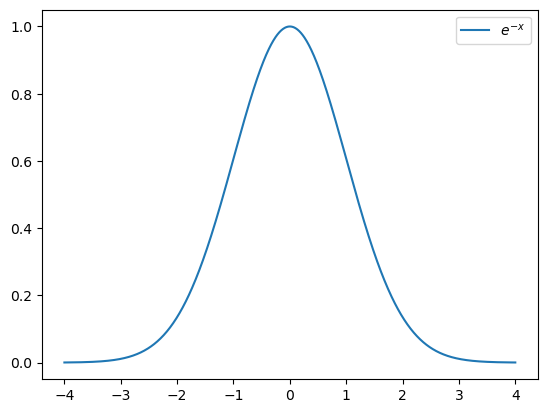

In [10]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x.
plt.plot(x, np.exp(-(x**2 / 2)), label=r'$e^{-x}$')

# Uncomment this to see it is equal to 1 / e^x.
# plt.plot(x, 1.0 / np.exp(x), label=r'$1.0 / e^x$')

# Absolute legend.
plt.legend();

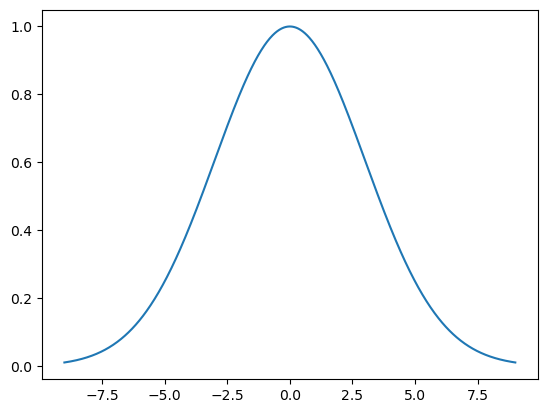

In [11]:
# These are involved in the exponent.
# Note we fix these values in subsequent plots.
mu, sigma = 0.0, 3.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Plot of full e part of normal pdf.
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

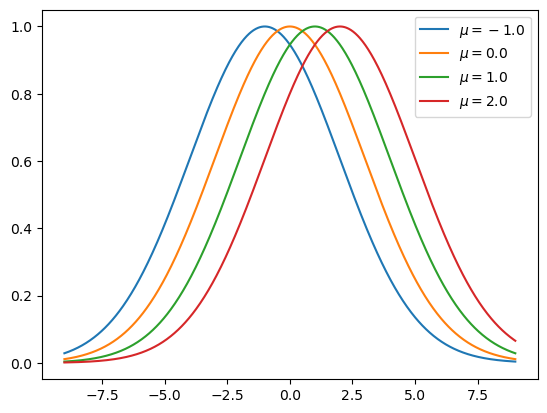

In [12]:
# Changing values of mu.

# Set some initial values, we'll ignore this mu.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of mu.
for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

# Add a legend.
plt.legend();

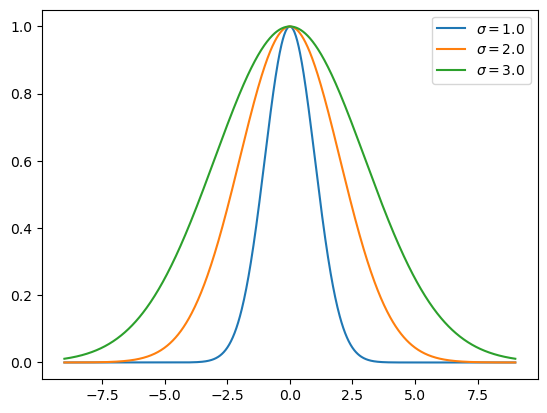

In [13]:
# Changing values of sigma.
# Note that sigma also occurs in the first part involving the square root.

# Set some initial values, we'll ignore this sigma.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of sigma.
for sigma in [1.0, 2.0, 3.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$')

# Add a legend.
plt.legend();

## Normal Distribution - All Together

***

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

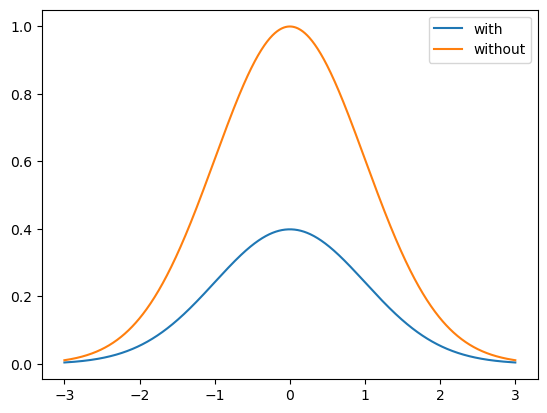

In [14]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y.
plt.plot(x, y, label='with')
# Show without scaling by first part..
plt.plot(x, part2, label='without')

plt.legend();

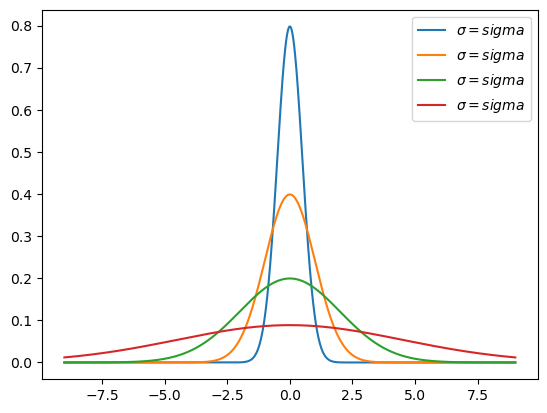

In [15]:
# Changing values of sigma.
# Note that sigma occurs in part 1 and part 2.
# So, the height of the curve is also affected.

# Set initial mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Different values of sigma.
for sigma in [0.5, 1.0, 2.0, 4.5]:
    # First part, with the square root.
    part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
    # Second part, with the e.
    part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
    # The output is the product.
    y = part1 * part2
    # Plot x and y.
    plt.plot(x, y, label='$\sigma = {sigma}$')

plt.legend();

## Percentiles

***

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [16]:
# Picking random values on the curve.
np.random.normal(0.0, 1.0)

-1.8123201498293997

In [17]:
# Picking random values on the curve - the max of 10000000.
# Would you describe it as an outlier?
np.random.normal(0.0, 1.0, 10000000).max()

5.194524541619627

In [18]:
# The x value at the 99th percentile.
# 99% of all randomly generated values will be below this.
ss.norm().ppf(0.99)

2.3263478740408408

In [19]:
# The 50th percentile - the mean in this case.
ss.norm().ppf(0.50)

0.0

In [20]:
# The percentile of 0.0 on the x axis.
ss.norm().cdf(0.0)

0.5

In [21]:
# The probability of generating a value less than 3.0 and greater than -3.0.
ss.norm().cdf(3.0) - ss.norm().cdf(-3.0)

0.9973002039367398

In [22]:
# Six sigma, where sigma is 1.0 and mu is 0.0.
ss.norm().cdf(6.0) - ss.norm().cdf(-6.0)

0.9999999980268246

## Quartiles

***

In [23]:
# 3rd quartile - the 75th percentile.
ss.norm().ppf(0.75)

0.6744897501960817

In [24]:
# 2nd quartile - the 50th percentile.
ss.norm().ppf(0.5)

0.0

In [25]:
# 1st quartile - the 25th percentile.
ss.norm().ppf(0.25)

-0.6744897501960817

Note the quartile is usually the range, not the point.

## Box Plots

***

## Inter-Quartile Range

***

***

### Exercise 1

*Remember to do these exercises in your own notebook in your assessment repository.*

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

***

## A Data Set

***

In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

In [ ]:
xs = np.vstack([np.linspace(i, i + 2.0, 20) for i in range(10, 20)])
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

x = xs.flatten()
y = ys.flatten()

In [ ]:
plt.plot(x, y, '.');

It looks like the points go from bottom left to top right.

Let's fit a best-fit straight line and see how it looks.

## Best Fit Line

***

In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

In [ ]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x.flatten(), y.flatten(), 1)

In [ ]:
xbestfit = np.linspace(x.flatten().min(), x.flatten().max(), 1000)
ybestfit = m * xbestfit + c

In [ ]:
plt.plot(x, y, '.')
plt.plot(xbestfit, ybestfit);

## Colours

***



In [ ]:
for i in range(len(x)):
    plt.plot(x[i], y[i], '.', label=f'{i}')
plt.legend();


***

### Exercise 2

*Remember to do these exercises in your own notebook in your assessment repository.*

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly rpoportional.

***

***

## End